In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps

from config import gkey

In [5]:
gmaps.configure(api_key=gkey)

In [6]:
csv_path = ('../WeatherPy/Output/citys.csv')
city_df = pd.read_csv(csv_path)
city_df.head()

Unnamed: 0          City      Lat       Lng  Max Temp  Humidity  \
0           0   port alfred -33.5906   26.8910     71.01        72   
1           1  port augusta -32.5000  137.7667     75.00        73   
2           2        tevriz  57.5090   72.4042     -9.38        91   
3           3  norman wells  65.2820 -126.8329    -32.80        75   
4           4          chuy -33.6971  -53.4616     62.65        91   

   Cloudiness  Wind Speed Country        Date  
0          35        1.99      ZA  1614332104  
1           0       17.27      AU  1614332105  
2         100        4.09      RU  1614332105  
3          20        5.75      CA  1614332106  
4           0        3.24      UY  1614332106

### Create a heat map that displays the humidity for every city from the part I of the homework

In [7]:
coordinates = city_df[['Lat','Lng']].astype(float)
humidity = city_df['Humidity'].astype(float)

In [8]:
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [9]:
heat_layer = gmaps.heatmap_layer(locations = coordinates,
                                 weights=humidity,
                                 dissipating=False,
                                 max_intensity=400,
                                 point_radius = 5)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

#### Screenshot of heatmap
<br>
<br>

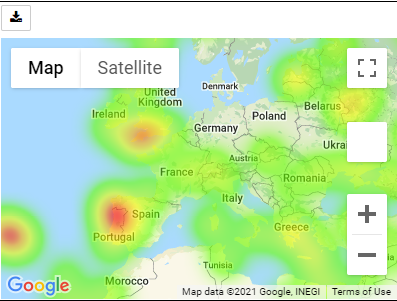

### Narrow down the DataFrame to find your ideal weather condition

In [10]:
city_df

Unnamed: 0          City      Lat       Lng  Max Temp  Humidity  \
0             0   port alfred -33.5906   26.8910     71.01        72   
1             1  port augusta -32.5000  137.7667     75.00        73   
2             2        tevriz  57.5090   72.4042     -9.38        91   
3             3  norman wells  65.2820 -126.8329    -32.80        75   
4             4          chuy -33.6971  -53.4616     62.65        91   
..          ...           ...      ...       ...       ...       ...   
553         553         bowen -20.0167  148.2333     73.40        88   
554         554    agucadoura  41.4318   -8.7804     55.99        82   
555         555       tarakan   3.3000  117.6333     80.60        83   
556         556        osmena  10.5208  119.9258     80.91        78   
557         557        kenora  49.8167  -94.4337     32.00        64   

     Cloudiness  Wind Speed Country        Date  
0            35        1.99      ZA  1614332104  
1             0       17.27      AU  1614332105  
2           100        4.09      RU  1614332105  
3            20        5.75      CA  1614332106  
4             0        3.24      UY  1614332106  
..          ...         ...     ...         ...  
553          75        6.91      AU  1614332087  
554           0        6.91      PT  1614332262  
555          20        3.44      ID  1614332046  
556          67        7.38      PH  1614332263  
557          90       18.41      CA  1614332263  

[558 rows x 10 columns]

In [12]:
new_city_df = city_df.loc[(city_df["Max Temp"] < 80) & (city_df["Max Temp"] > 70) \
                                    & (city_df["Wind Speed"] < 10) \
                                    & (city_df["Cloudiness"] == 0)].dropna()
new_city_df.head()

Unnamed: 0               City      Lat      Lng  Max Temp  Humidity  \
8             8  sao joao da barra -21.6403 -41.0511     75.20        94   
86           86             dalaba  10.7000 -12.2500     75.61        18   
87           87              arlit  18.7369   7.3853     79.12        14   
339         339              ginir   7.1333  40.7000     78.21        25   
524         524             viedma -40.8135 -62.9967     70.43        27   

     Cloudiness  Wind Speed Country        Date  
8             0        2.30      BR  1614332107  
86            0        7.78      GN  1614332129  
87            0        5.35      NE  1614332129  
339           0        8.32      ET  1614332200  
524           0        8.59      AR  1614332254

In [20]:
len(new_city_df)

6

In [21]:
hotel_df = new_city_df
hotel_df['Hotel Name'] = ""
hotel_df = hotel_df[['City', 'Country', 'Lat', 'Lng', 'Max Temp', 'Wind Speed', 'Hotel Name']]
hotel_df

City Country      Lat      Lng  Max Temp  Wind Speed  \
8    sao joao da barra      BR -21.6403 -41.0511     75.20        2.30   
86              dalaba      GN  10.7000 -12.2500     75.61        7.78   
87               arlit      NE  18.7369   7.3853     79.12        5.35   
339              ginir      ET   7.1333  40.7000     78.21        8.32   
524             viedma      AR -40.8135 -62.9967     70.43        8.59   
532          taoudenni      ML  22.6783  -3.9836     71.78        4.45   

    Hotel Name  
8               
86              
87              
339             
524             
532

In [25]:
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json?"
hotels = []

params = {
    'key': gkey,
    'radius': 5000,
    'keyword':'hotel'
}

for index, row in hotel_df.iterrows():
    
    city = row['City']
    lat = row['Lat']
    lng = row['Lng']    
    
    params["location"] = f"{lat},{lng}"
    
    response = requests.get(base_url, params=params)    
    response_json = response.json()
    
    try:
        hotel_df.loc[index, "Hotel Name"] = response_json['results'][0]['name']        
    
    except:
        print(f'No hotel found within radius for {city}')

No hotel found within radius for taoudenni


In [26]:
hotel_df

City Country      Lat      Lng  Max Temp  Wind Speed  \
8    sao joao da barra      BR -21.6403 -41.0511     75.20        2.30   
86              dalaba      GN  10.7000 -12.2500     75.61        7.78   
87               arlit      NE  18.7369   7.3853     79.12        5.35   
339              ginir      ET   7.1333  40.7000     78.21        8.32   
524             viedma      AR -40.8135 -62.9967     70.43        8.59   
532          taoudenni      ML  22.6783  -3.9836     71.78        4.45   

                     Hotel Name  
8           Pousada Porto Prime  
86                    Hôtel SIB  
87         Hôtel Telwa Bungalow  
339    Bale Ginir Tourist Hotel  
524  Casa Crespo Hotel Boutique  
532

In [32]:
hotel_df.to_csv('Output/vacation_hotels.csv')

In [27]:
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations = hotel_df[["Lat", "Lng"]]

In [29]:
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

<br>
<br>

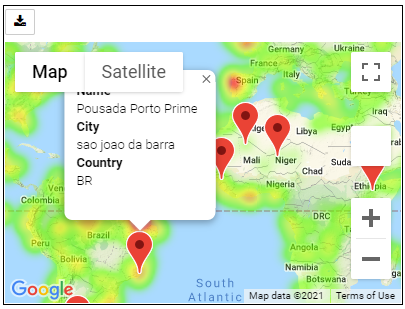